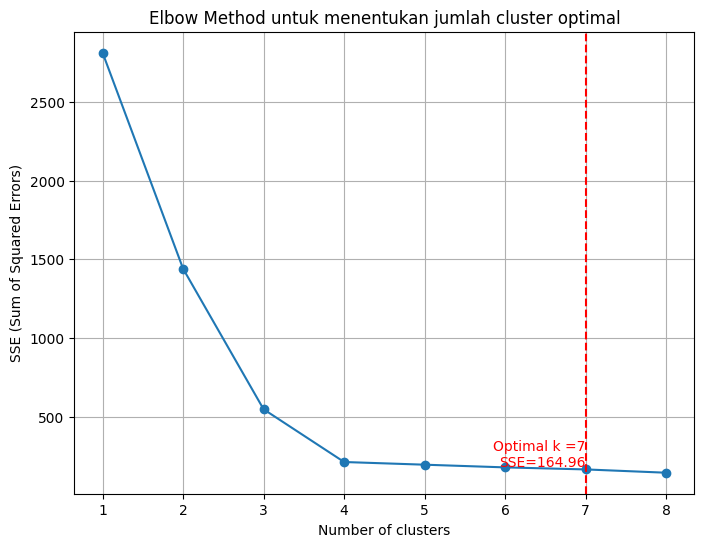

Jumlah cluster optimal: 7.
Nilai SSE pada k=7 adalah 164.96.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Membuat dataset buatan
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Menentukan rentang jumlah cluster yang akan diuji
range_n_clusters = range(1, 9)

# Menyimpan hasil SSE untuk setiap jumlah cluster
sse = []

# Menghitung SSE untuk setiap jumlah cluster
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Menentukan titik elbow terbaik
# Menghitung perubahan nilai SSE
slope_changes = np.diff(sse,2) # Menghitung perubahan kedua pada SSE
optimal_k = np.argmin(slope_changes) + 2 # +2 karena np.diff mengurangi panjang array

# Membuat plot untuk menentukan titik elbow
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, sse, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method untuk menentukan jumlah cluster optimal')
plt.grid(True)

# Menandai tiitk elbow
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.text(optimal_k, sse[optimal_k-1], f'Optimal k ={optimal_k}\nSSE={sse[optimal_k-1]:.2f}', 
         horizontalalignment='right', verticalalignment='bottom', color='r')

plt.show()

# Menampilkan hasil
print(f'Jumlah cluster optimal: {optimal_k}.')
print(f'Nilai SSE pada k={optimal_k} adalah {sse[optimal_k-1]:.2f}.')